# Identificacion de Sistemas
Marco Antonio Esquivel Basaldua

In [1]:
import numpy as np
import control as ctr
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

Sea un filtro digital causal, cuyas secuencias de entrada y salida en el tiempo ha sido la siguiente:
![](table1.png)
encontrar el modelo ARMAX que mejor representa el comportamiento del filtro.

In [2]:
N = 9

k = np.linspace(0,N, N+1)
U_k = np.ones(N+1)
U_k[0] = 0
Y_k = np.zeros(N+1)

Y_k[1] = 0.2 
Y_k[2] = 0.6
Y_k[3] = 1.25
Y_k[4] = 1.13
Y_k[5] = 0.917
Y_k[6] = 1.1
Y_k[7] = 1.01
Y_k[8] = 0.98
Y_k[9] = 1.0

## Modelo de primer orden


Estimated parameters [0.28604528 0.74139907]
y(k)_1 [0.         0.79860813 0.91302624 1.09895567 1.06463024 1.00370259
 1.05604888 1.0303048  1.02172345]


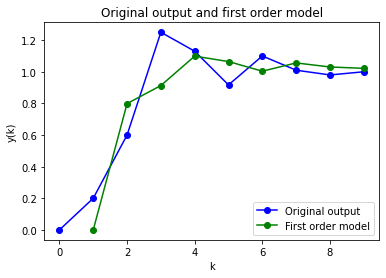

Cost function 0.23015111233448016


In [3]:
F_1 = np.zeros((N,2))

for i in range(0,N):
    F_1[i,0] = Y_k[i]
    F_1[i,1] = U_k[i]

    
y = Y_k[1:N+1]

theta_1 = np.linalg.solve((F_1.T).dot(F_1), (F_1.T).dot(y))

print('Estimated parameters',theta_1)

m_1 = F_1.dot(theta_1)

print('y(k)_1', m_1)

plt.plot(k,Y_k,'-bo',label='Original output')
plt.plot(np.linspace(1,N, N),m_1,'-go',label='First order model')
plt.legend(loc='best')
plt.title('Original output and first order model')
plt.xlabel('k')
plt.ylabel('y(k)')
plt.show()

## Cost function
E = y - F_1.dot(theta_1)
e_1 = E.dot(E)
print('Cost function',e_1)

Estimated parameters [-0.7359269   0.20495556  1.30019922  0.29805828]
y(k)_2 [0.         0.50301384 1.15301384 1.19769247 0.80132221 1.02285455
 1.15501232 0.97668216 1.08042245]


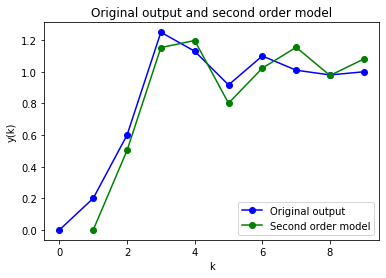

Cost function 0.11023502178954611


In [4]:
F_2 = np.zeros((N,4))

for i in range(1,N):
    F_2[i,0] = Y_k[i-1]
    F_2[i,1] = Y_k[i-2]
    F_2[i,2] = U_k[i-1]
    F_2[i,3] = U_k[i-2]

    
y = Y_k[1:N+1]

theta_2 = np.linalg.solve((F_2.T).dot(F_2), (F_2.T).dot(y))

print('Estimated parameters',theta_2)

m_2 = F_2.dot(theta_2)

print('y(k)_2', m_2)

plt.plot(k,Y_k,'-bo',label='Original output')
plt.plot(np.linspace(1,N, N),m_2,'-go',label='Second order model')
plt.legend(loc='best')
plt.title('Original output and second order model')
plt.xlabel('k')
plt.ylabel('y(k)')
plt.show()

## Cost function
E = y - F_2.dot(theta_2)
e_2 = E.dot(E)
print('Cost function',e_2)

Estimated parameters [ 0.28285363  0.32757352  0.00580444  1.719009   -0.82423588 -0.53138417]
y(k)_3 [0.         0.         1.25       1.13       0.91466099 1.09596312
 1.00017936 0.98147188 1.01472466]


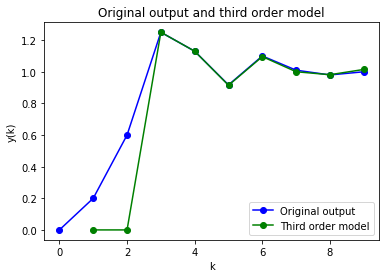

Cost function 0.40033719448579935


In [5]:
F_3 = np.zeros((N,6))

for i in range(2,N):
    F_3[i,0] = Y_k[i-1]
    F_3[i,1] = Y_k[i-2]
    F_3[i,2] = Y_k[i-3]
    F_3[i,3] = U_k[i-1]
    F_3[i,4] = U_k[i-2]
    F_3[i,5] = U_k[i-3]

    
y = Y_k[1:N+1]

theta_3 = np.linalg.solve((F_3.T).dot(F_3), (F_3.T).dot(y))

print('Estimated parameters',theta_3)

m_3 = F_3.dot(theta_3)

print('y(k)_3', m_3)

plt.plot(k,Y_k,'-bo',label='Original output')
plt.plot(np.linspace(1,N, N),m_3,'-go',label='Third order model')
plt.legend(loc='best')
plt.title('Original output and third order model')
plt.xlabel('k')
plt.ylabel('y(k)')
plt.show()

## Cost function
E = y - F_3.dot(theta_3)
e_3 = E.dot(E)
print('Cost function',e_3)